# Introduction

- in this notebook, i am going to classifie good apple (tasty) and bad apple (awful).
- dataset link: [Apple Quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/discussion/471663)
- future uses => in apple market, example for other fruits

# Setup

## Importing Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

# for model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# for accuracy
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# for data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder    # for encoding
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Load the data

In [3]:
data = pd.read_csv("apple_quality.csv")

# Data Understanding

**checking sample of data**

In [4]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


**A_id:** Unique identifier for each fruit

**Size**: Size of the fruit

**Weight**: Weight of the fruit

**Sweetness**: Degree of sweetness of the fruit

**Crunchiness**: Texture indicating the crunchiness of the fruit

**Juiciness**: Level of juiciness of the fruit

**Ripeness**: Stage of ripeness of the fruit

**Acidity**: Acidity level of the fruit

**Quality**: Overall quality of the fruit

**checking data information**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


- we have 4001 training data and expect the last rows, all freatures don't have `NaN` values. (we need to drop it)
- So, we have 4000 training data with 6 features each (doesn't included `A_id`, and `Quality`).
- expect `Acidity` and `Quality`, the rest are `float64`. 
- eventhough `Acidity` have numerical value, it show as `object`. (we need change it to `float` data type)

In [6]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


**checking categorical labels**

In [7]:
data["Quality"].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

# Data Cleaning

To fix the missing value (NaN) 
1. Get rid of the corresponding disticts / `.dropna()`
2. Get rid of the whole attribute(feature)    / `.drop()`
2. Imputation {Set the missing values to some value(zero,the mean, the median, etc)}  / `.fillna()!`

**droping A_id**

In [8]:
data.drop(columns = ["A_id"], inplace=True)
#data = data.drop('A_Id', axis=1)
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


**dropping the last row**

In [9]:
data.dropna(inplace=True)

data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


**label encoding**

In [10]:
"""
good => 1
bad  => 0
"""

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Quality"] = encoder.fit_transform(data["Quality"])

In [11]:
encoder.classes_

array(['bad', 'good'], dtype=object)

In [12]:
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


**changing `Acidity` datatype**

In [15]:
data = data.astype({'Acidity': 'float64'})

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 265.6 KB


# Data Visualization

In [17]:
tmp = data
tmp.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

C:\Users\Utente\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utente\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utente\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utente\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

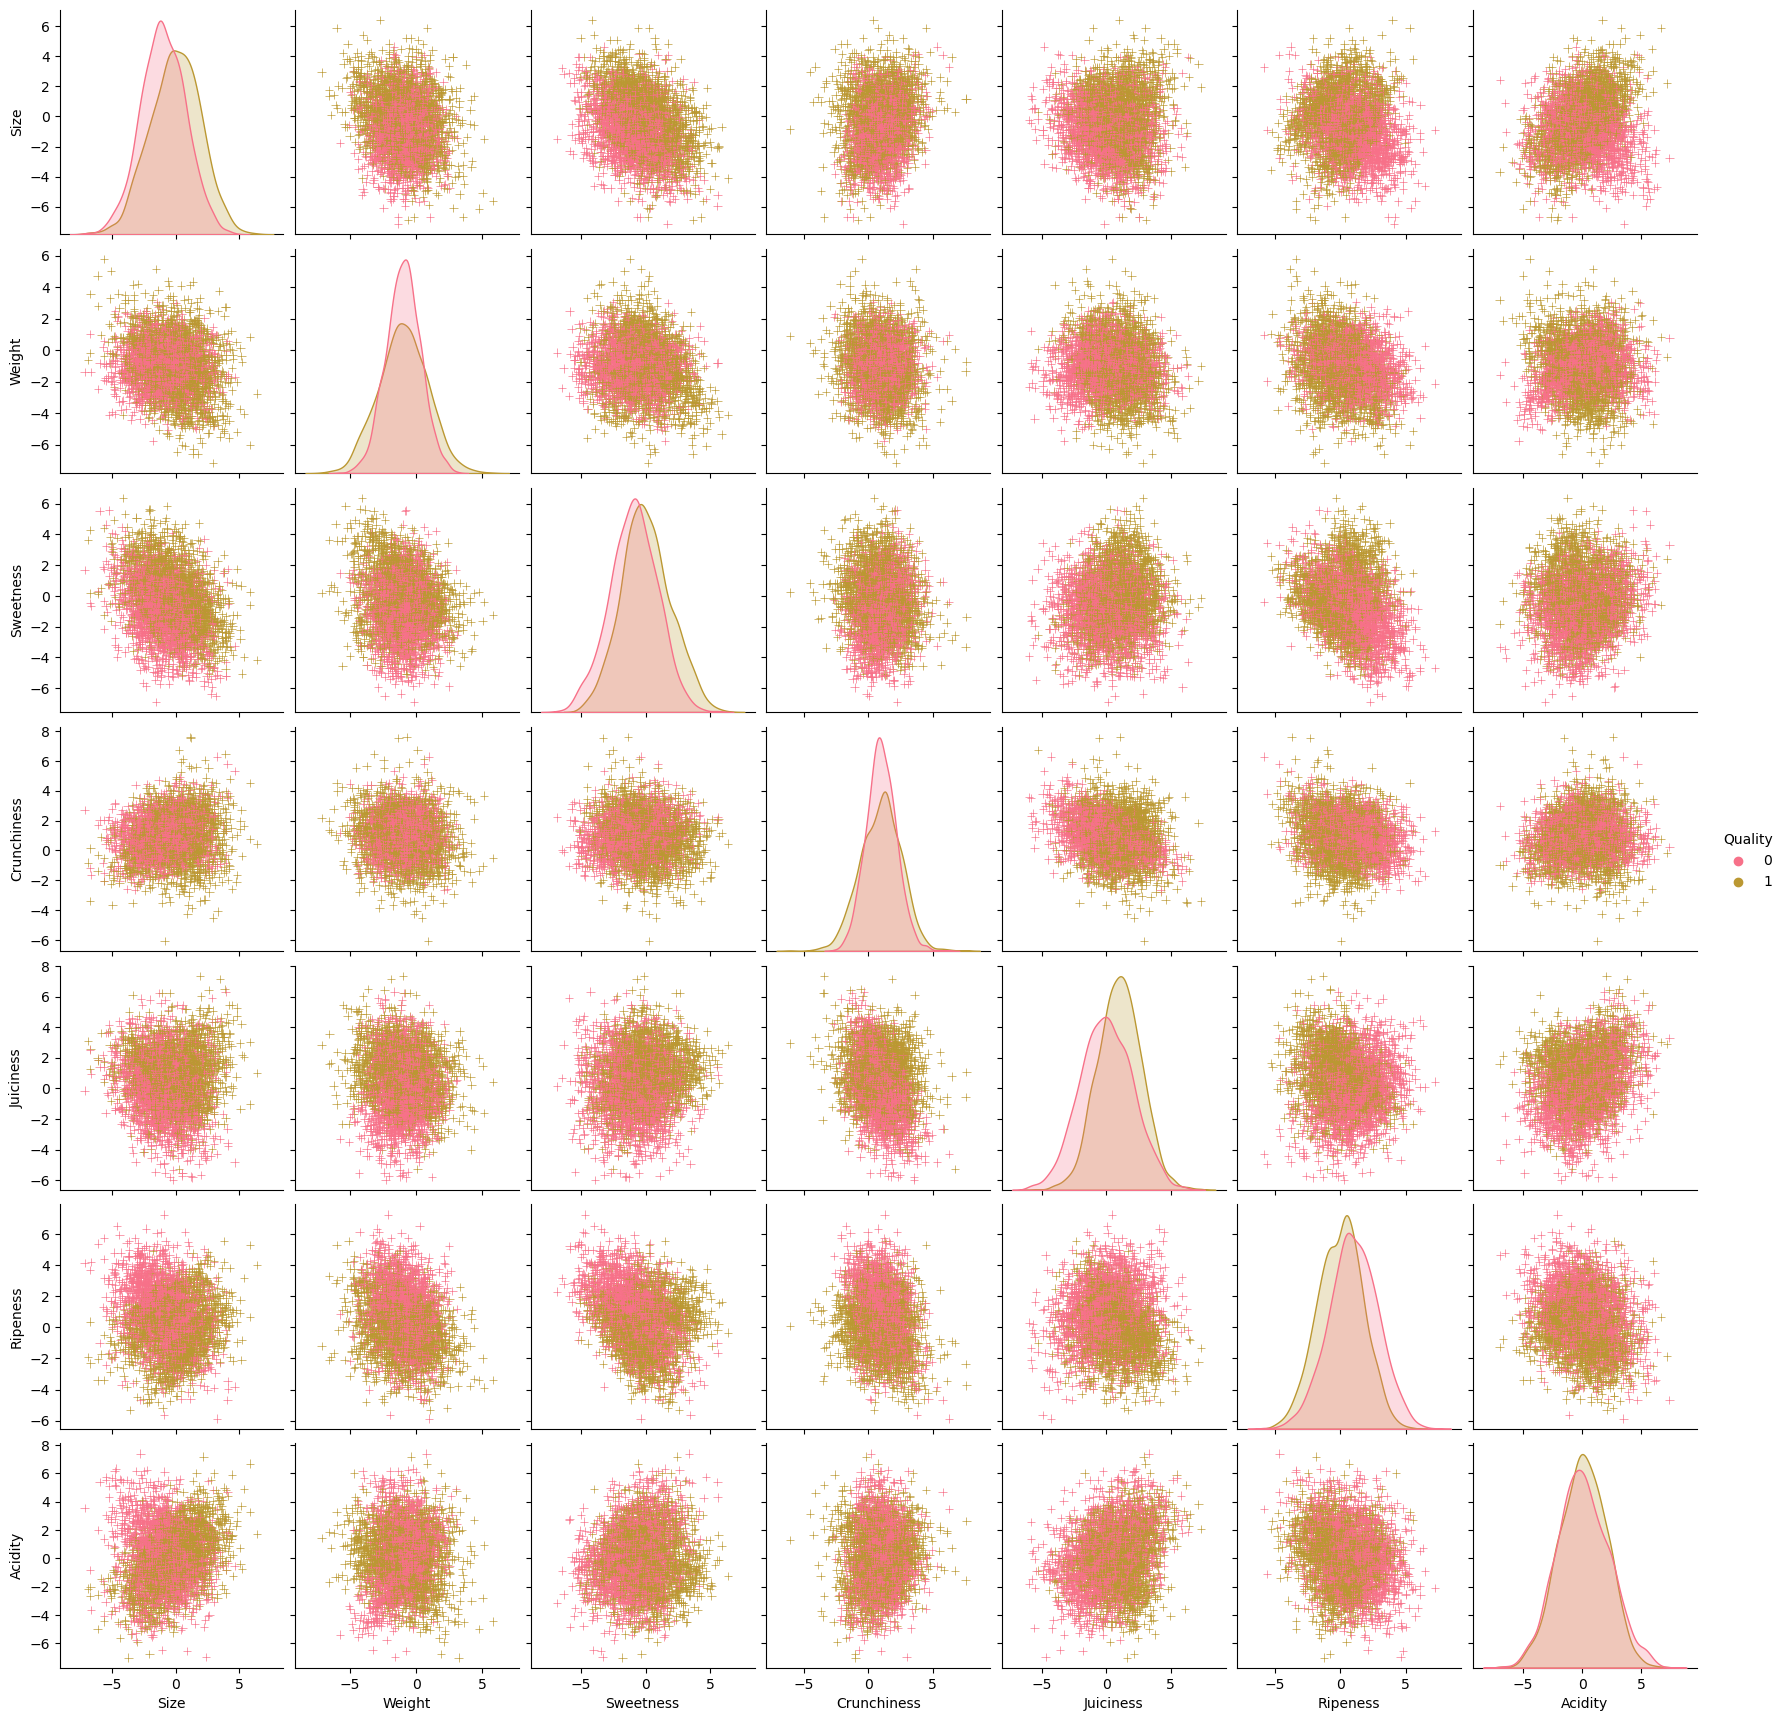

In [19]:
tmp = data
g = sns.pairplot(tmp, hue='Quality', markers='+')
plt.show()

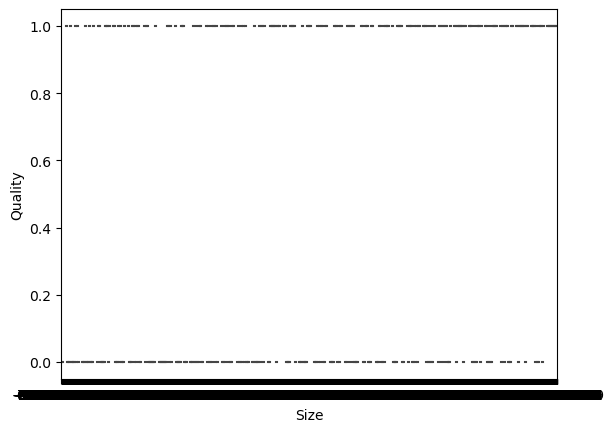

In [20]:
g = sns.violinplot(y='Quality', x='Size', data=data, inner='quartile')
plt.show()

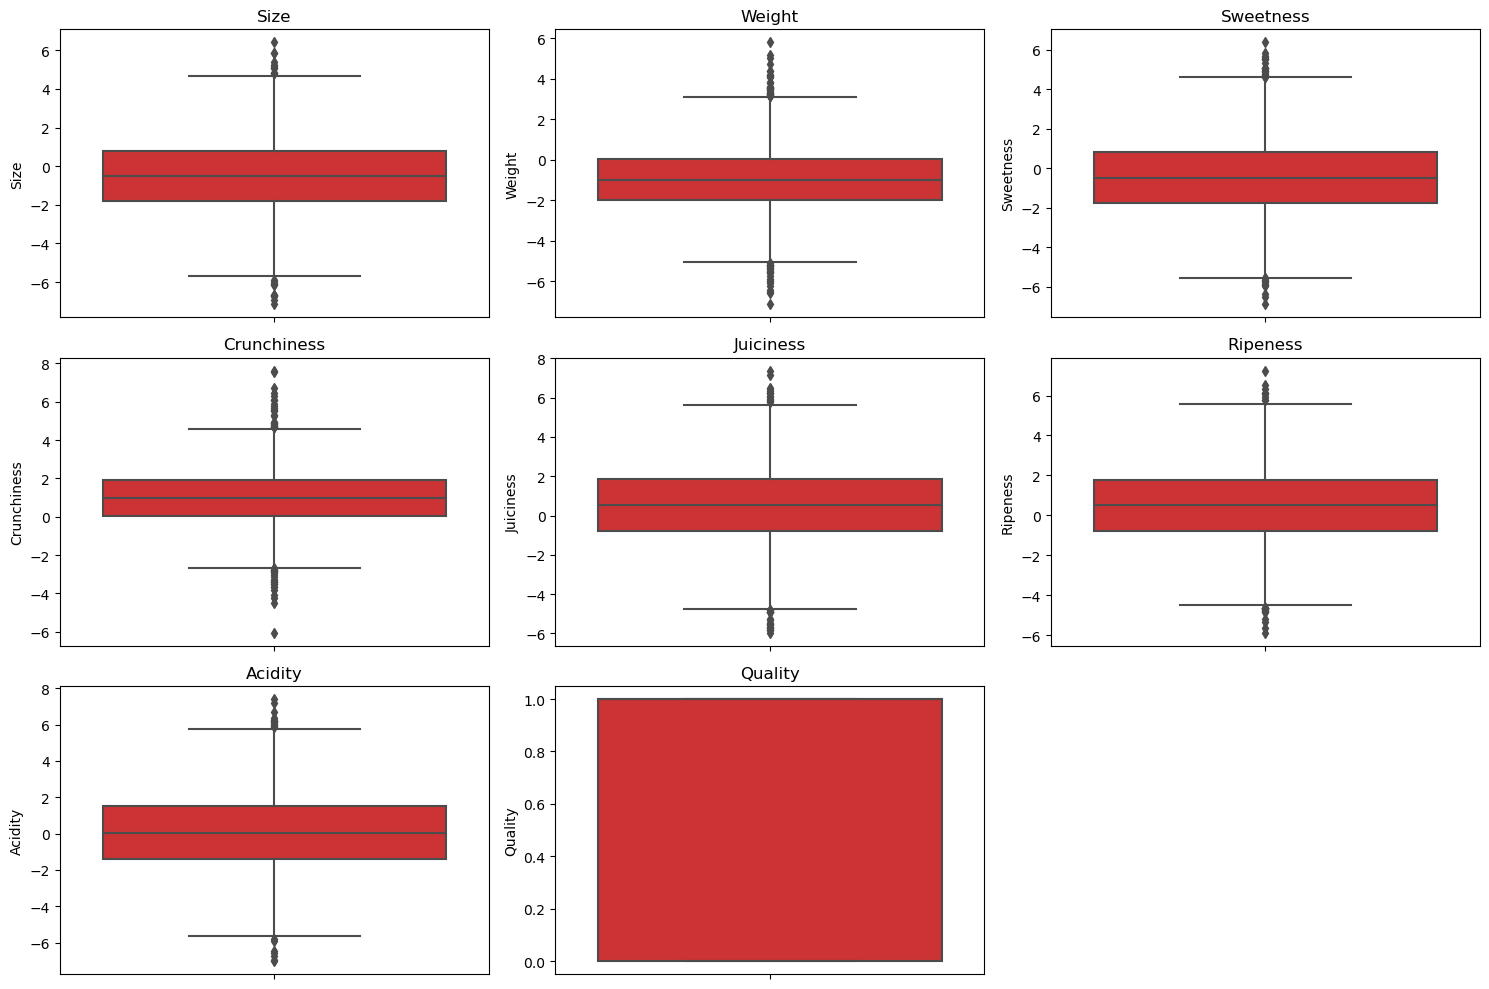

In [21]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity','Quality']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

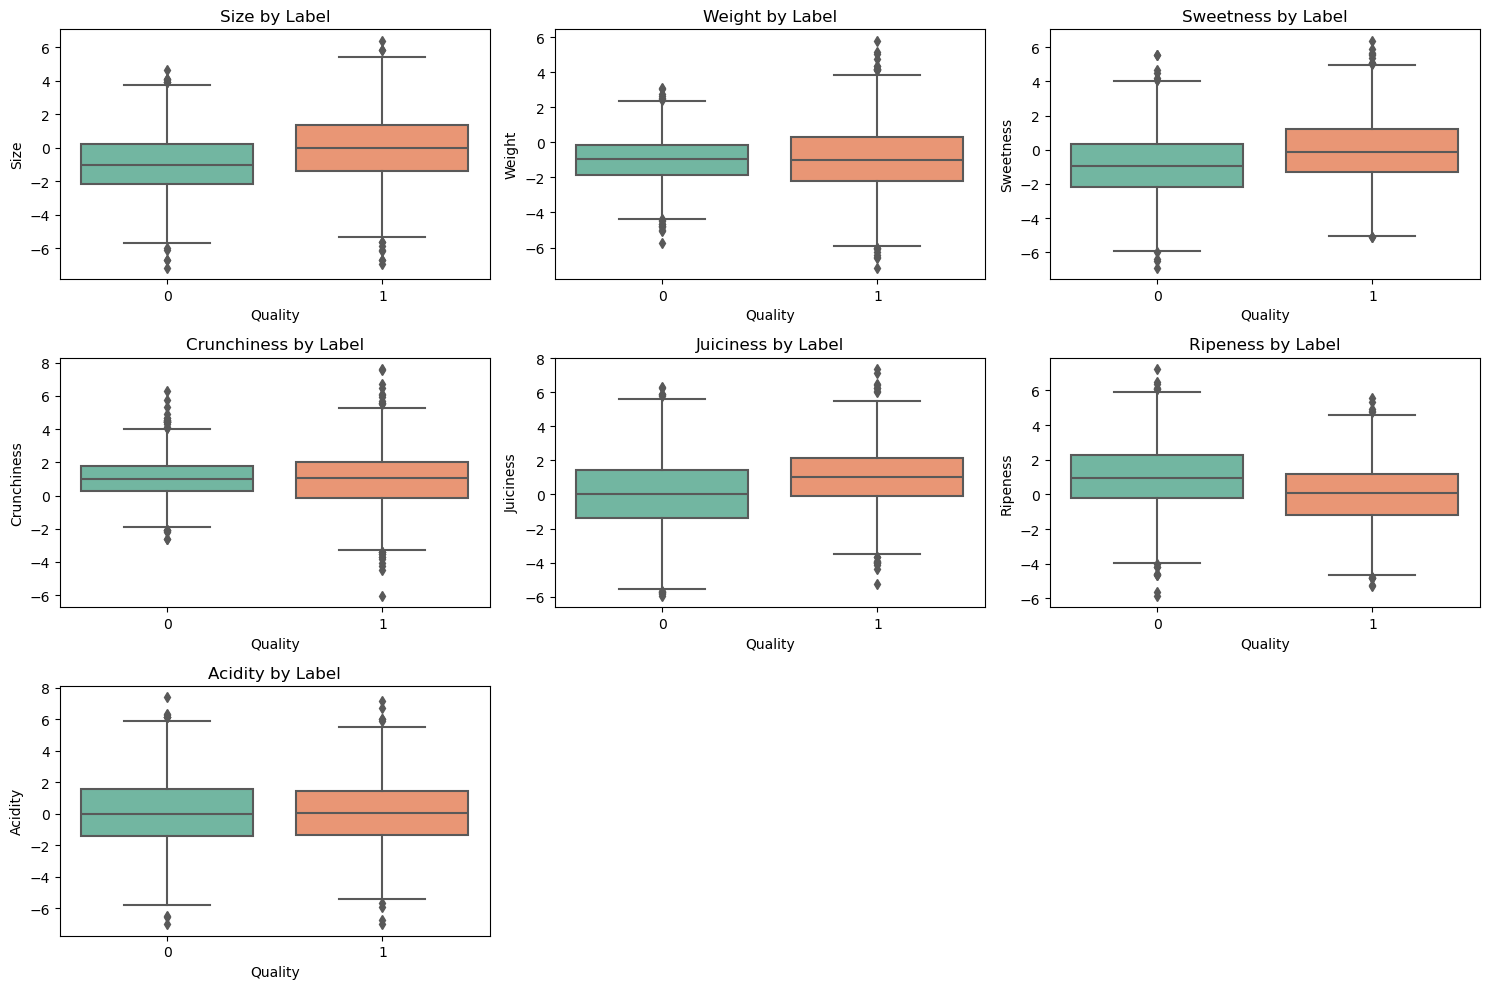

In [22]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(data.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Quality', y=column, data=data)
    plt.title(f'{column} by Label')

plt.tight_layout()
plt.show()

## Data preprocessing

**splitting target and feature**

In [23]:
X = data.drop('Quality', axis=1)
y = data["Quality"]

In [24]:
print(X.shape,"\n")
print(type(X),"\n")
print(X.head())

(4000, 7) 

<class 'pandas.core.frame.DataFrame'> 

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984


In [25]:
print(y.shape,"\n")
print(type(y),"\n")
print(y.head())

(4000,) 

<class 'pandas.core.series.Series'> 

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int32


**splitting training and testing data**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3200, 7)
(3200,)
(800, 7)
(800,)


# Modeling

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=0)

log_clf.fit(X_train, y_train)

# predict
y_pred = log_clf.predict(X_test)

In [32]:
w_star = np.insert(log_clf.coef_, 0, np.array(log_clf.intercept_))
print(w_star)

[ 6.76174155e-01  6.30179512e-01  2.66085948e-01  5.43573729e-01
  5.67548766e-05  4.45283029e-01 -1.31673863e-01 -3.06207069e-01]


In [28]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.76569822, 0.73570759, 0.74015009])

In [33]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {log_clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

print(f"\nAccuracy = {log_clf.score(X_test, y_test)*100}%")

Classification report for classifier LogisticRegression(random_state=0):
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       399
           1       0.74      0.79      0.76       401

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



Accuracy = 75.125%


## RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Random forest classifier
rf_model = RandomForestClassifier(n_estimators=400, n_jobs=1, random_state=42)
rf_model.fit(X_train,y_train)

# predict
y_pred = rf_model.predict(X_test)

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.8809747 , 0.88940956, 0.89118199])

In [28]:
# confusion matrix and accuracy

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

print(f"\nAccuracy = {rf_model.score(X_test, y_test)*100}%")

Classification report for classifier RandomForestClassifier(n_estimators=400, n_jobs=1, random_state=42):
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       388
           1       0.86      0.90      0.88       412

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



Accuracy = 87.25%


## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)

knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88659794, 0.89690722, 0.88273921])

In [31]:
# confusion matrix and accuracy

print(f"Classification report for classifier {knn_clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

print(f"\nAccuracy = {knn_clf.score(X_test, y_test)*100}%")

Classification report for classifier KNeighborsClassifier(n_jobs=-1, n_neighbors=7):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       388
           1       0.88      0.92      0.90       412

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



Accuracy = 89.25%


## MLP

In [32]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[80,40,20], max_iter=200, random_state=42,
                        learning_rate_init=0.003 )
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(mlp_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.92408622, 0.92502343, 0.93527205])

In [34]:
# confusion matrix and accuracy

print(f"Classification report for classifier {mlp_clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

print(f"\nAccuracy = {mlp_clf.score(X_test, y_test)*100}%")

Classification report for classifier MLPClassifier(hidden_layer_sizes=[80, 40, 20], learning_rate_init=0.003,
              random_state=42):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       388
           1       0.91      0.96      0.94       412

    accuracy                           0.94       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.94      0.93       800



Accuracy = 93.5%
